In [71]:
library('childesr')
library('ggplot2')

In [ ]:
print(packageVersion("dbplyr"))
print(packageVersion("childesr"))

In [10]:
collections  = childesr::get_collections(db_version = "2020.1")
names(collections)

Using supported database version: '2020.1'.



[1] "collection_id"   "collection_name" "data_source"

In [138]:
eng_2020 = childesr::get_tokens(collection = c("Eng-NA", "Eng-UK"), token = "*", 
    db_version = "2020.1")

Using supported database version: '2020.1'.

Getting data from 1190 children in 72 corpora...



In [139]:
eng_2020 = merge(eng_2020, collections)

In [140]:
eng_2018 = childesr::get_tokens(collection = c("Eng-NA", "Eng-UK"), token = "*", 
    db_version = "2018.1")

Using supported database version: '2018.1'.

Getting data from 673 children in 62 corpora...



In [142]:
eng_2018$data_source = 'CHILDES'

In [143]:
names(eng_2020)

[1] "collection_name"   "collection_id"     "id"               
 [4] "gloss"             "language"          "token_order"      
 [7] "prefix"            "part_of_speech"    "stem"             
[10] "actual_phonology"  "model_phonology"   "suffix"           
[13] "num_morphemes"     "english"           "clitic"           
[16] "utterance_type"    "corpus_name"       "speaker_code"     
[19] "speaker_name"      "speaker_role"      "target_child_name"
[22] "target_child_age"  "target_child_sex"  "corpus_id"        
[25] "speaker_id"        "target_child_id"   "transcript_id"    
[28] "utterance_id"      "data_source"

In [144]:
eng_2020_children_per_corpus = aggregate(target_child_name ~ corpus_name + data_source, eng_2020, function(x){
    length(unique(x))
})

In [145]:
names(eng_2020_children_per_corpus)[3] = 'num_children_2020'

In [146]:
eng_2018_children_per_corpus = aggregate(target_child_name ~ corpus_name + data_source, eng_2018, function(x){
    length(unique(x))
})

In [147]:
names(eng_2018_children_per_corpus)[3] = 'num_children_2018'

In [148]:
eng_children_per_corpus = merge(eng_2020_children_per_corpus, eng_2018_children_per_corpus, all=T)

In [149]:
eng_children_per_corpus[order(eng_children_per_corpus$data_source),]

,corpus_name,data_source,num_children_2020,num_children_2018
,<chr>,<chr>,<int>,<int>
1,Bates,CHILDES,30,30
2,Belfast,CHILDES,11,11
3,Bernstein,CHILDES,9,9
4,Bliss,CHILDES,7,7
5,Bloom,CHILDES,3,NA
6,Bloom70,CHILDES,NA,3
7,Bohannon,CHILDES,3,3
8,Braunwald,CHILDES,1,1
9,Brent,CHILDES,17,NA


In [150]:
subset(eng_children_per_corpus, is.na(num_children_2020))

,corpus_name,data_source,num_children_2020,num_children_2018
,<chr>,<chr>,<int>,<int>
6,Bloom70,CHILDES,NA,3
11,Carterette,CHILDES,NA,4
14,Cornell,CHILDES,NA,9
15,Cruttenden,CHILDES,NA,2
50,Providence,CHILDES,NA,6


Bloom70 was renamed Bloom; Providence moved to PhonBank; Cruttenden and Cornell are gone

In [151]:
sum(subset(eng_children_per_corpus, data_source == 'PhonBank')$num_children_2020)

[1] 74

In [152]:
subset(eng_children_per_corpus, !is.na(num_children_2018) & !is.na(num_children_2020
    ) & (num_children_2020 > num_children_2018))

,corpus_name,data_source,num_children_2020,num_children_2018
,<chr>,<chr>,<int>,<int>
38,McCune,CHILDES,10,6
64,Weist,CHILDES,7,5


In [153]:
print(unique(subset(eng_2020, corpus_name == 'McCune')$target_child_name))
print(unique(subset(eng_2018, corpus_name == 'McCune')$target_child_name))

 [1] "Alice"       "Laura_Aurie" "Laura"       "Jas"         "Jase"       
 [6] "Patrick"     "Johnnie"     "Rick"        "David"       NA           
[11] "Ronny"      
[1] "Alice" "ALI"   NA      "Laura" "Jas"   "Jase"  "Rick" 


In [154]:
print(unique(subset(eng_2020, corpus_name == 'Weist')$target_child_name))
print(unique(subset(eng_2018, corpus_name == 'Weist')$target_child_name))

[1] "Benjamin" "Emily"    "Emma"     "Jillian"  "Matt"     "Roman"    "Matty"   
[1] NA        "Emily"   "Emma"    "Jillian" "Matt"    "Roman"  


In [155]:
subset(eng_children_per_corpus, !is.na(num_children_2018) & !is.na(num_children_2020
    ) & (num_children_2020 < num_children_2018))

corpus_name,data_source,num_children_2020,num_children_2018
<chr>,<chr>,<int>,<int>


In [156]:
print(unique(subset(eng_2020, corpus_name == 'Bates')$target_child_name))
print(unique(subset(eng_2018, corpus_name == 'Bates')$target_child_name))

 [1] NA       "Betty"  "Chuck"  "Doug"   "Ed"     "Frank"  "Gloria" "Ivy"   
 [9] "Hank"   "Jane"   "Jim"    "Kathy"  "Keith"  "Kent"   "Mandy"  "Linda" 
[17] "Nan"    "Pete"   "Olivia" "Paula"  "Steve"  "Ruth"   "Sue"    "Tom"   
[25] "Vicki"  "Will"   "Wanda"  "Zeke"   "Amy"    "George" "Rick"  
 [1] NA       "Betty"  "Doug"   "Chuck"  "Ed"     "Frank"  "Gloria" "Hank"  
 [9] "Ivy"    "Jane"   "Jim"    "Kathy"  "Kent"   "Keith"  "Mandy"  "Linda" 
[17] "Nan"    "Olivia" "Paula"  "Pete"   "Ruth"   "Steve"  "Vicki"  "Tom"   
[25] "Sue"    "Will"   "Wanda"  "Amy"    "Zeke"   "George" "Rick"  


In [157]:
setdiff(unique(subset(eng_2018, corpus_name == 'Bates')$target_child_name), 
        unique(subset(eng_2020, corpus_name == 'Bates')$target_child_name))

character(0)

In [158]:
transcripts_2020 = childesr::get_transcripts(db_version = "2020.1")

Using supported database version: '2020.1'.



In [159]:
transcripts_2018 = childesr::get_transcripts(db_version = "2018.1")

Using supported database version: '2018.1'.



In [160]:
bates_transcripts_2020 = subset(transcripts_2020, corpus_name == 'Bates')

In [161]:
names(bates_transcripts_2020)

[1] "transcript_id"     "corpus_name"       "language"         
 [4] "date"              "filename"          "target_child_name"
 [7] "target_child_age"  "target_child_sex"  "collection_name"  
[10] "pid"               "collection_id"     "corpus_id"        
[13] "target_child_id"

In [162]:
vicki_transcript_id = bates_transcripts_2020[grep('Free20/vicki.xml', bates_transcripts_2020$filename),]$transcript_id
#print(bates_transcripts_2020[grep('Free20/vicki.xml', bates_transcripts_2020$filename),])

In [163]:
vicki_transcript_id

[1] 6627

In [164]:
subset(eng_2020, transcript_id == vicki_transcript_id)

,collection_name,collection_id,id,gloss,language,token_order,prefix,part_of_speech,stem,actual_phonology,⋯,speaker_role,target_child_name,target_child_age,target_child_sex,corpus_id,speaker_id,target_child_id,transcript_id,utterance_id,data_source
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>
5323964,Eng-NA,2,6829759,uh,eng,1,,,,,⋯,Target_Child,Vicki,20.00041,female,53,3207,3207,6627,1590850,CHILDES
5323965,Eng-NA,2,6829760,look,eng,1,,v,look,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590856,CHILDES
5323966,Eng-NA,2,6829761,Vicki,eng,2,,n:prop,Vicki,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590856,CHILDES
5323967,Eng-NA,2,6829762,where's,eng,1,,pro:int,where,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590859,CHILDES
5323968,Eng-NA,2,6829763,that,eng,2,,det:dem,that,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590859,CHILDES
5323969,Eng-NA,2,6829764,car,eng,3,,n,car,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590859,CHILDES
5323970,Eng-NA,2,6829765,gonna,eng,4,,part,go,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590859,CHILDES
5323971,Eng-NA,2,6829766,go,eng,5,,v,go,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590859,CHILDES
5323972,Eng-NA,2,6829767,hm,eng,1,,co,hm,,⋯,Mother,Vicki,20.00041,female,53,3209,3207,6627,1590861,CHILDES


In [169]:
subset(eng_2018, target_child_name == 'Vicki')$target_child_age

[1] 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041
   [9] 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041
  [17] 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041
  [25] 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041
  [33] 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041 20.00041
  [41] 20.00041 20.00041 20.00041 28.00057 28.00057 28.00057 28.00057 28.00057
  [49] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [57] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [65] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [73] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [81] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [89] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
  [97] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [105] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [113] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [121] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [129] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [137] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [145] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [153] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [161] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [169] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [177] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [185] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [193] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [201] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [209] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [217] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [225] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [233] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [241] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [249] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [257] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [265] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [273] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [281] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [289] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [297] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [305] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [313] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [321] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [329] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [337] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [345] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [353] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [361] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [369] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [377] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [385] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [393] 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057 28.00057
 [401] 28.00057 28.00057 28.00057 28.00057 28.00057 2

In [40]:
print(unique(subset(eng_2020, corpus_name == 'NewmanRatner')$target_child_name))

  [1] "5196AV18"         "4269LP"           "4273WC24"        
  [4] "4697JK24"         "4452CM24"         "4664AM"          
  [7] "4310AM24"         "4687NH24mos"      "4629AB24"        
 [10] "4641CC24"         "4650KS24"         "4724LM24mos"     
 [13] "4708IB24"         "4802JP"           "4743NA24"        
 [16] "4854MP24mos"      "4734ES"           "4619WC"          
 [19] "4814BS24"         "4929MM24mos"      "4767JC"          
 [22] "5224EZS24"        "4903LS24"         "4731SA"          
 [25] "4997LM24"         "1234AB"           "5039MB"          
 [28] "5066WT24"         "5111CG24"         "4946RC"          
 [31] "5196AVI24"        "4801RB"           "5073AC"          
 [34] "5118PM24"         "4825GG"           "5013LA"          
 [37] "5193HB"           "5244SE24"         "5057MS"          
 [40] "5266EC"           "5244RE24"         "5346GG24mos"     
 [43] "5561AC"           "5837AK24mos"      "5571FW"          
 [46] "5707RT"           "5440JJ24mos"      "5593SH24" 

In [ ]:
# Is there a naming scheme in NewmanRatner?

In [ ]:
#Charlotte: 158 more names 
# + 134 from Newman Ratner 
# + 33 from PhonBank
# -5 from Bates

In [170]:
# Number of Tokens per Child
eng_2018_tokens_per_child = aggregate(gloss ~ corpus_name + data_source + target_child_name,
    eng_2018, length)
names(eng_2018_tokens_per_child)[4] = 'num_tokens_2018'

eng_2020_tokens_per_child = aggregate(gloss ~ corpus_name + data_source + target_child_name,
    eng_2020, length)
names(eng_2020_tokens_per_child)[4] = 'num_tokens_2020'

eng_tokens_per_child = merge(eng_2020_tokens_per_child, eng_2018_tokens_per_child, all=T)
eng_tokens_per_child[is.na(eng_tokens_per_child)] = 0

In [387]:
eng_tokens_per_child$child_label = paste0(eng_tokens_per_child$corpus_name, 
                                        '-', eng_tokens_per_child$target_child_name) 
head(eng_tokens_per_child)

,corpus_name,data_source,target_child_name,num_tokens_2020,num_tokens_2018,child_label,percent_change
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,Bates,CHILDES,Amy,952,952,Bates-Amy,0.0000000000
2,Bates,CHILDES,Betty,1295,1302,Bates-Betty,-0.0053763441
3,Bates,CHILDES,Chuck,1712,1714,Bates-Chuck,-0.0011668611
4,Bates,CHILDES,Doug,1491,1491,Bates-Doug,0.0000000000
5,Bates,CHILDES,Ed,2018,2017,Bates-Ed,0.0004957858
6,Bates,CHILDES,Frank,1524,1524,Bates-Frank,0.0000000000


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (geom_label).”


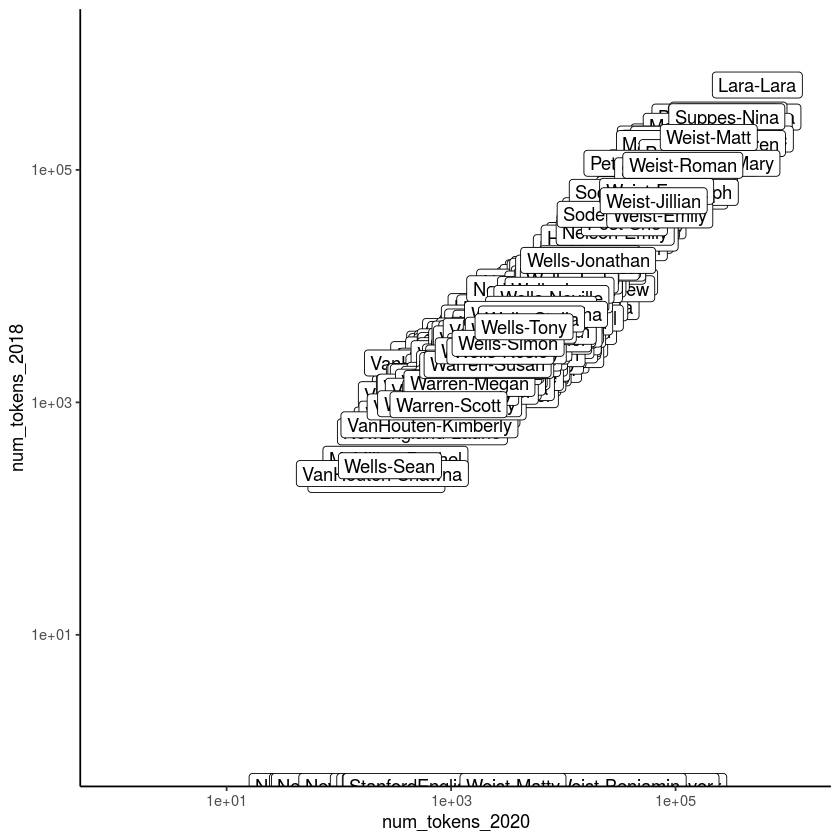

In [405]:
exclude_list = c('Bloom', 'Bloom70','Providence', 'MPI-EVA-Manchester','Bates',
    'Bernstein', 'Bloom73', 'Carterette', 'Bohannon', 'Cornell', 'Demetras2',
    'Feldman', 'Gopnik', 'Hicks', 'HSLLD','MacWhinney', 'McCune', 'Snow',
    'Cruttenden', 'Morisset')

ggplot(subset(eng_tokens_per_child, !(corpus_name %in% exclude_list))
)+ geom_label(aes(x=num_tokens_2020 , 
    y=num_tokens_2018, label=child_label))  + theme_classic(
) + scale_y_log10(limits= c(1, 1200000)) + scale_x_log10(limits= c(1, 1200000))

In [406]:
eng_tokens_per_child$percent_change = (eng_tokens_per_child$num_tokens_2020 - eng_tokens_per_child$num_tokens_2018) / eng_tokens_per_child$num_tokens_2018

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 524 rows containing non-finite values (stat_bin).”


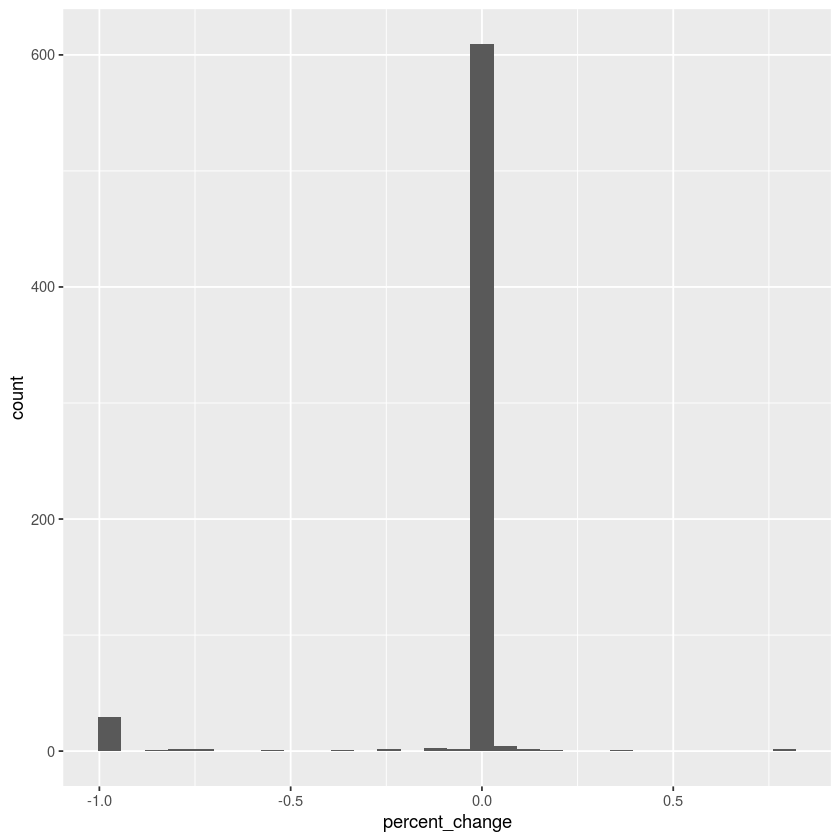

In [407]:
ggplot(eng_tokens_per_child) + geom_histogram(aes(x=percent_change))

In [408]:
subset(eng_tokens_per_child, percent_change == -1 &  !(corpus_name %in% exclude_list)) 

corpus_name,data_source,target_child_name,num_tokens_2020,num_tokens_2018,child_label,percent_change
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>


In [409]:
# Look for traanscripts with 0 tokens

In [410]:
nrow(subset(eng_2020, corpus_name == 'Garvey'))

[1] 51002

In [411]:
num_tokens_per_transcript_2020 =  aggregate(id ~ transcript_id , eng_2020, length)
names(num_tokens_per_transcript_2020) = c('transcript_id_2020','num_tokens_2020')

In [412]:
nrow(num_tokens_per_transcript_2020)

[1] 11764

In [413]:
eng_transcripts_2020 = subset(transcripts_2020, collection_name %in% c('Eng-NA', 'Eng-UK'))

In [252]:
names(eng_transcripts_2020)[1] = 'transcript_id_2020'

In [253]:
# a great many transcripts without tokens

In [254]:
names(num_tokens_per_transcript_2020)

[1] "transcript_id_2020" "num_tokens_2020"

In [255]:
names(eng_transcripts_2020)

[1] "transcript_id_2020" "corpus_name"        "language"          
 [4] "date"               "filename"           "target_child_name" 
 [7] "target_child_age"   "target_child_sex"   "collection_name"   
[10] "pid"                "collection_id"      "corpus_id"         
[13] "target_child_id"

In [260]:
eng_transcripts_2020_w_token_counts = merge(eng_transcripts_2020, num_tokens_per_transcript_2020, all=T, 
by= 'transcript_id_2020')
eng_transcripts_2020_w_token_counts[is.na(eng_transcripts_2020_w_token_counts)] = 0

In [262]:
missing_files = subset(eng_transcripts_2020_w_token_counts, num_tokens_2020 == 0)[,c('transcript_id_2020','filename','num_tokens_2020','corpus_name')]

In [263]:
head(missing_files)

,transcript_id_2020,filename,num_tokens_2020,corpus_name
,<int>,<chr>,<dbl>,<chr>
426,3685,Eng-NA/NewEngland/32/07.xml,0,NewEngland
437,3696,Eng-NA/NewEngland/32/34.xml,0,NewEngland
441,3700,Eng-NA/NewEngland/32/56.xml,0,NewEngland
459,3718,Eng-NA/NewEngland/32/97.xml,0,NewEngland
462,3721,Eng-NA/NewEngland/60/01.xml,0,NewEngland
463,3722,Eng-NA/NewEngland/60/02.xml,0,NewEngland


In [238]:
tail(missing_files)

,transcript_id,filename,num_tokens_2020,corpus_name
,<int>,<chr>,<dbl>,<chr>
10260,41531,Eng-NA/Menn/010818.xml,0,Menn
10261,41532,Eng-NA/Menn/ShV1.xml,0,Menn
10262,41533,Eng-NA/Menn/010819.xml,0,Menn
10264,41535,Eng-NA/Menn/010821.xml,0,Menn
10932,42203,Eng-NA/Providence/Alex/010700.xml,0,Providence
11245,42516,Eng-NA/Providence/Violet/030200.xml,0,Providence


In [239]:
head(subset(missing_files, corpus_name == 'MacWhinney'))

,transcript_id,filename,num_tokens_2020,corpus_name
,<int>,<chr>,<dbl>,<chr>
3814,7073,Eng-NA/MacWhinney/000203a.xml,0,MacWhinney
3815,7074,Eng-NA/MacWhinney/000203b.xml,0,MacWhinney
3816,7075,Eng-NA/MacWhinney/000203c.xml,0,MacWhinney
3817,7076,Eng-NA/MacWhinney/000203d.xml,0,MacWhinney
3818,7077,Eng-NA/MacWhinney/000614a.xml,0,MacWhinney
3819,7078,Eng-NA/MacWhinney/000614b.xml,0,MacWhinney


Looking at the original files:  
NewEngland cases are dummy files  
Menn are dummy files  
MacWhinney are dummy files

In [264]:
num_tokens_per_transcript_2018 =  aggregate(id ~ transcript_id + corpus_name, eng_2018, length)
names(num_tokens_per_transcript_2018) = c('transcript_id_2018','corpus_name','num_tokens_2018')

In [241]:
nrow(num_tokens_per_transcript_2018)

[1] 8414

In [266]:
eng_transcripts_2018 = subset(transcripts_2018, collection_name %in% c('Eng-NA', 'Eng-UK'))
names(eng_transcripts_2018)[1] = 'transcript_id_2018'

In [267]:
eng_transcripts_2018_w_token_counts = merge(eng_transcripts_2018, num_tokens_per_transcript_2018, all=T)
eng_transcripts_2018_w_token_counts[is.na(eng_transcripts_2018_w_token_counts)] = 0

In [268]:
names(eng_transcripts_2018_w_token_counts)

[1] "transcript_id_2018" "corpus_name"        "language"          
 [4] "date"               "filename"           "corpus_id"         
 [7] "target_child_id"    "target_child_age"   "target_child_name" 
[10] "target_child_sex"   "collection_id"      "collection_name"   
[13] "pid"                "num_tokens_2018"

In [269]:
names(eng_transcripts_2020_w_token_counts)

[1] "transcript_id_2020" "corpus_name"        "language"          
 [4] "date"               "filename"           "target_child_name" 
 [7] "target_child_age"   "target_child_sex"   "collection_name"   
[10] "pid"                "collection_id"      "corpus_id"         
[13] "target_child_id"    "num_tokens_2020"

In [ ]:
#Difference seems to be related to the age filter
# did the age of the Bates kids change?
# there are still some Tom ones missing

# 3 likely options bailing early, missed files, or threadlocking?

In [287]:
eng_transcripts_2020_w_token_counts$filename = gsub(
'Eng-NA/', '', eng_transcripts_2020_w_token_counts$filename)
eng_transcripts_2020_w_token_counts$filename = gsub(
'Eng-UK/', '', eng_transcripts_2020_w_token_counts$filename)

In [288]:
eng_transcript_token_counts = merge(eng_transcripts_2018_w_token_counts, 
    eng_transcripts_2020_w_token_counts, by= c('collection_name','corpus_name','filename'), 
    all = T)
eng_transcript_token_counts[is.na(eng_transcript_token_counts)] = 0

In [289]:
eng_transcript_token_counts$index = 1:nrow(eng_transcript_token_counts)

In [290]:
nrow(subset(eng_transcript_token_counts, num_tokens_2020 == num_tokens_2018))

[1] 2774

In [292]:
eng_transcript_token_counts[which(eng_transcript_token_counts$num_tokens_2020 == max(
eng_transcript_token_counts$num_tokens_2020)),]

,collection_name,corpus_name,filename,transcript_id_2018,language.x,date.x,corpus_id.x,target_child_id.x,target_child_age.x,target_child_name.x,⋯,date.y,target_child_name.y,target_child_age.y,target_child_sex.y,pid.y,collection_id.y,corpus_id.y,target_child_id.y,num_tokens_2020,index
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4737,Eng-NA,Hall,Hall/BlackPro/mim.xml,6425,eng,1984-01-01,57,4108,57.00117,Mia,⋯,0,Mia,57.00117,female,11312/c-00016184-1,2,40,2264,43904,4737


In [293]:
eng_transcript_token_counts[which(eng_transcript_token_counts$num_tokens_2018 == max(
eng_transcript_token_counts$num_tokens_2018)),]

,collection_name,corpus_name,filename,transcript_id_2018,language.x,date.x,corpus_id.x,target_child_id.x,target_child_age.x,target_child_name.x,⋯,date.y,target_child_name.y,target_child_age.y,target_child_sex.y,pid.y,collection_id.y,corpus_id.y,target_child_id.y,num_tokens_2020,index
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
4737,Eng-NA,Hall,Hall/BlackPro/mim.xml,6425,eng,1984-01-01,57,4108,57.00117,Mia,⋯,0,Mia,57.00117,female,11312/c-00016184-1,2,40,2264,43904,4737


In [294]:
names(eng_transcript_token_counts)

[1] "collection_name"     "corpus_name"         "filename"           
 [4] "transcript_id_2018"  "language.x"          "date.x"             
 [7] "corpus_id.x"         "target_child_id.x"   "target_child_age.x" 
[10] "target_child_name.x" "target_child_sex.x"  "collection_id.x"    
[13] "pid.x"               "num_tokens_2018"     "transcript_id_2020" 
[16] "language.y"          "date.y"              "target_child_name.y"
[19] "target_child_age.y"  "target_child_sex.y"  "pid.y"              
[22] "collection_id.y"     "corpus_id.y"         "target_child_id.y"  
[25] "num_tokens_2020"     "index"

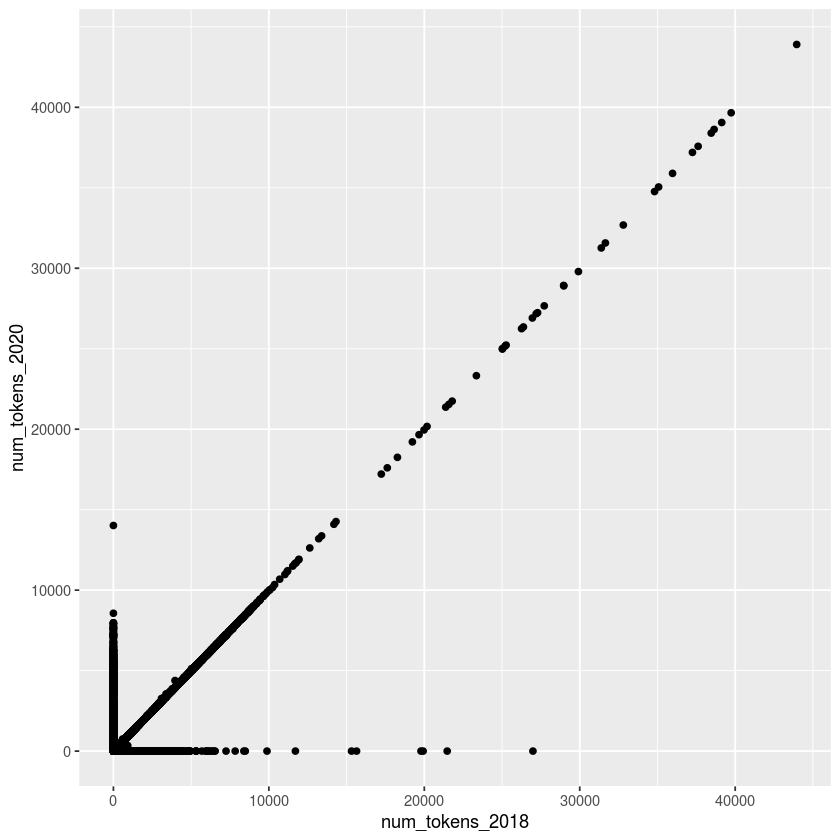

In [306]:
ggplot(subset(eng_transcript_token_counts,
! corpus_name %in% c('Bloom', 'Bloom70','Providence', 'NewportRatner')
)) + geom_point(aes(x=num_tokens_2018, y=num_tokens_2020))

In [309]:
subset(subset(eng_transcript_token_counts,
! corpus_name %in% c('Bloom', 'Bloom70','Providence', 'MPI-EVA-Manchester')
), num_tokens_2020 > 5000 &  num_tokens_2018 == 0 )

,collection_name,corpus_name,filename,transcript_id_2018,language.x,date.x,corpus_id.x,target_child_id.x,target_child_age.x,target_child_name.x,⋯,date.y,target_child_name.y,target_child_age.y,target_child_sex.y,pid.y,collection_id.y,corpus_id.y,target_child_id.y,num_tokens_2020,index
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3633,Eng-NA,Feldman,Feldman/020123.xml,0,0,0,0,0,0,0,⋯,1994-09-10,Steven,25.75618,male,11312/c-00016039-1,2,54,3244,8563,3633
3799,Eng-NA,Gelman,Gelman/2004-Gender/30.xml,0,0,0,0,0,0,0,⋯,0,0,56.36255,female,11312/a-00012242-1,2,50,3057,5150,3799
3859,Eng-NA,Gelman,Gelman/2014-IndDiff/03P-R2.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/a-00031985-1,2,50,0,5914,3859
3918,Eng-NA,Gelman,Gelman/2014-IndDiff/13P-R1.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/a-00032044-1,2,50,0,7157,3918
3919,Eng-NA,Gelman,Gelman/2014-IndDiff/13P-R2.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/a-00032045-1,2,50,0,14016,3919
4038,Eng-NA,Gelman,Gelman/2014-IndDiff/33P-R1.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/a-00032164-1,2,50,0,5307,4038
4039,Eng-NA,Gelman,Gelman/2014-IndDiff/33P-R2.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/a-00032165-1,2,50,0,6112,4039
11038,Eng-NA,Snow,Snow/030421a.xml,0,0,0,0,0,0,0,⋯,1980-01-06,Nathaniel,40.69077,male,11312/c-00017446-1,2,78,5564,5979,11038
12149,Eng-UK,Korman,Korman/lake/16.xml,0,0,0,0,0,0,0,⋯,0,0,0.00000,0,11312/c-00019261-1,12,219,0,6003,12149


In [381]:
shared_transcripts =  subset(eng_transcript_token_counts,
! corpus_name %in% c('Bloom', 'Bloom70','Providence', 'MPI-EVA-Manchester','Bates',
    'Bernstein', 'Bloom73', 'Carterette', 'Bohannon', 'Cornell', 'Demetras2',
    'Feldman', 'Gopnik', 'Hicks', 'HSLLD','MacWhinney', 'McCune', 'Snow')
)
# Bloom70 renamed to Bloom
# Providence added
# MPI added
# Bates numbered datasets have the numbers removed
# Carterette no longer present
# COrnell no longer present
# Demetras2 internal structure changed
# Feldman et al lettered files consolidated into single files
# Gopnik has a different internal structure
# Hicks has an internal structure
# HSLLD conslidated (some lettered files renamed)
# MacWhinney filenames changed
# McCune conslidated (some lettered files renamed)
# Snow conslidated (some lettered files renamed)

In [382]:
shared_transcripts$percent_change = (shared_transcripts$num_tokens_2020 - 
shared_transcripts$num_tokens_2018) / (shared_transcripts$num_tokens_2018)

In [386]:
missing_from_2020 = subset(shared_transcripts, percent_change == -1)
missing_from_2020

,collection_name,corpus_name,filename,transcript_id_2018,language.x,date.x,corpus_id.x,target_child_id.x,target_child_age.x,target_child_name.x,⋯,target_child_name.y,target_child_age.y,target_child_sex.y,pid.y,collection_id.y,corpus_id.y,target_child_id.y,num_tokens_2020,index,percent_change
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1258,Eng-NA,Brent,Brent/c1/000902.xml,3784,eng,1996-12-30,42,0,0.00000,0,⋯,0,0,0,11312/a-00012146-1,2,66,3839,0,1258,-1
11108,Eng-NA,Sprott,Sprott/06Sealsquid.xml,6461,eng,1990-10-16,58,0,0.00000,0,⋯,0,0,0,0,0,0,0,0,11108,-1
11120,Eng-NA,Sprott,Sprott/17SqeakyMom.xml,6473,eng,1991-01-29,58,0,0.00000,0,⋯,0,0,0,0,0,0,0,0,11120,-1
11279,Eng-NA,VanHouten,VanHouten/Threes/freeplay/bestparkf.xml,5863,eng,1984-01-01,52,3746,40.19795,Matthew,⋯,0,0,0,0,0,0,0,0,11279,-1
11347,Eng-NA,VanHouten,VanHouten/Twos/freeplay/nipf.xml,5931,eng,1984-01-01,52,3777,28.00057,Adam,⋯,0,0,0,0,0,0,0,0,11347,-1
11348,Eng-NA,VanHouten,VanHouten/Twos/freeplay/parkf.xml,5932,eng,1984-01-01,52,3746,28.00057,Matthew,⋯,0,0,0,0,0,0,0,0,11348,-1
11349,Eng-NA,VanHouten,VanHouten/Twos/freeplay/pricef.xml,5933,eng,1984-01-01,52,3785,28.00057,Peter,⋯,0,0,0,0,0,0,0,0,11349,-1
11350,Eng-NA,VanHouten,VanHouten/Twos/freeplay/raidf.xml,5934,eng,1984-01-01,52,3787,28.00057,Tommy,⋯,0,0,0,0,0,0,0,0,11350,-1
11351,Eng-NA,VanHouten,VanHouten/Twos/freeplay/riotf.xml,5935,eng,1984-01-01,52,3789,28.00057,Robert,⋯,0,0,0,0,0,0,0,0,11351,-1


Warning message:
“Use of `shared_transcripts$percent_change` is discouraged. Use `percent_change` instead.”
Warning message:
“Removed 7922 rows containing non-finite values (stat_density).”


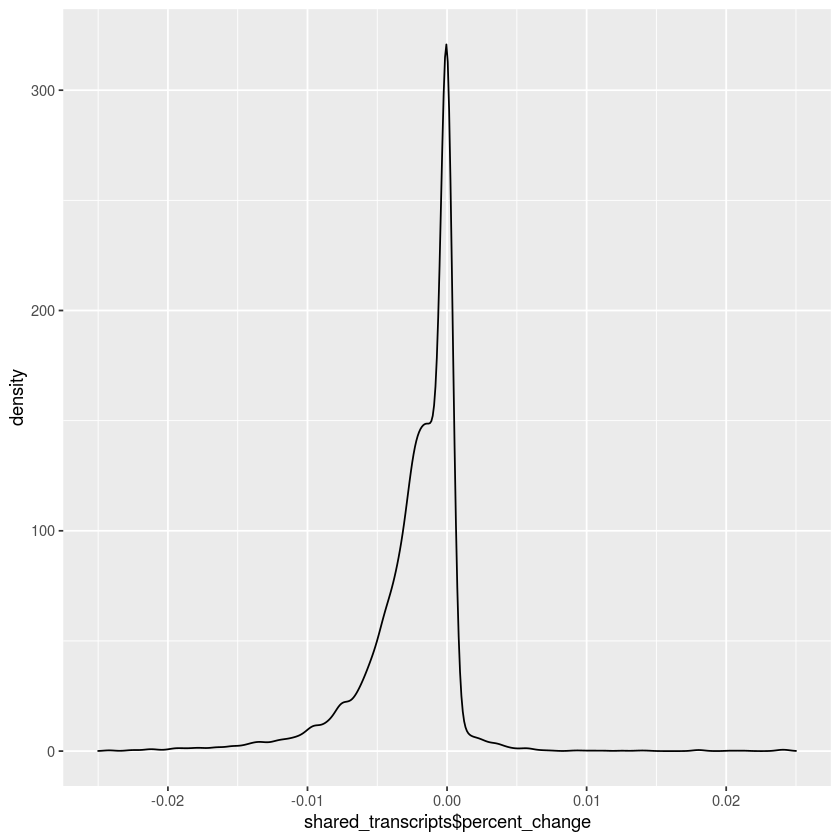

In [321]:
ggplot(shared_transcripts) + geom_density(aes(x= shared_transcripts$percent_change)
) + xlim (-.025,.025)

Warning message:
“Use of `shared_transcripts$percent_change` is discouraged. Use `percent_change` instead.”
Warning message:
“Removed 12024 rows containing non-finite values (stat_density).”


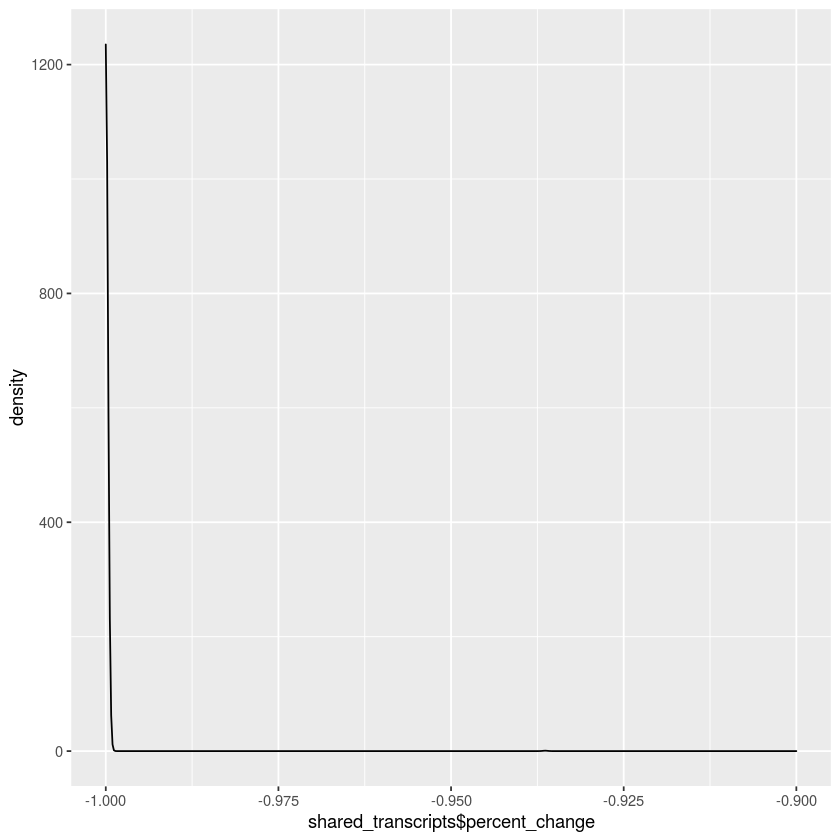

In [327]:
ggplot(shared_transcripts) + geom_density(aes(x= shared_transcripts$percent_change)
) + xlim(-1, -.9)